# LSTM Autoencoder
- [Reference](https://machinelearningmastery.com/lstm-autoencoders/)

In [0]:
# lstm autoencoder recreate sequence
from numpy import array
from keras.models import Sequential
from keras.models import Model
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import RepeatVector
from keras.layers import TimeDistributed
from keras.utils import plot_model

In [0]:
# define input sequence
sequence = array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])
# reshape input into [samples, timesteps, features]
n_in = len(sequence)
sequence = sequence.reshape((1, n_in, 1))

In [0]:
# define model
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(n_in,1)))
model.add(RepeatVector(n_in))
model.add(LSTM(100, activation='relu', return_sequences=True))
model.add(TimeDistributed(Dense(1)))
model.compile(optimizer='adam', loss='mse')

In [6]:
# fit model
model.fit(sequence, sequence, epochs=300, verbose=0)

In [0]:
model = Model(inputs=model.inputs, outputs=model.layers[0].output)

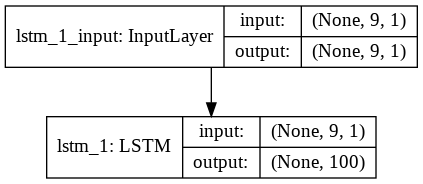

In [11]:
plot_model(model, show_shapes=True)

In [14]:
# demonstrate recreation
yhat = model.predict(sequence, verbose=0)
print(yhat)

[[0.         0.         0.04370879 0.         0.         0.
  0.         0.08350571 0.06764935 0.         0.00728242 0.08297601
  0.11109914 0.06915951 0.         0.         0.06161117 0.
  0.         0.04932409 0.10811158 0.         0.07120071 0.
  0.         0.06652765 0.         0.10511594 0.         0.
  0.         0.07965742 0.         0.05908636 0.08887514 0.
  0.         0.         0.02480098 0.09049849 0.         0.00736929
  0.10418732 0.         0.08937625 0.         0.         0.
  0.         0.         0.         0.09386861 0.         0.06279578
  0.01140097 0.         0.         0.         0.0750011  0.
  0.14306958 0.0904395  0.00723937 0.         0.         0.
  0.         0.         0.         0.00057094 0.         0.
  0.02199819 0.         0.04135632 0.         0.         0.
  0.06761232 0.         0.         0.04484864 0.10257515 0.01213881
  0.         0.05316177 0.         0.         0.06604929 0.
  0.         0.12960924 0.         0.02552506 0.         0.
  0.    